In [2]:
library(igraph)
library(data.table)
library(rjson)

In [3]:
edge_file = "san_francisco-censustracts-2017-4-All-MonthlyAggregate.csv"
json_file = "san_francisco_censustracts.json"
edge_list = read.csv(file = edge_file, header = TRUE, sep = ",")
edge_table = as.data.table(edge_list)
edge_data = edge_table[month == 12][, c("sourceid", "dstid", "mean_travel_time")]
json_data = fromJSON(file = json_file)
features = json_data $ features
len = length(features)

In [4]:
id_list = c()
x_list = c()
y_list = c()
dist_list = c()
loc_list = list()

for(i in 1:len){
    feature = features[[i]]
    dist_list = c(dist_list, feature$properties$DISPLAY_NAME)
    location = feature$geometry$coordinates
    location_list = split(unlist(location), 1:2)
    avg_x = mean(location_list[[1]])
    avg_y = mean(location_list[[2]])
    x_list = c(x_list, avg_x)
    y_list = c(y_list, avg_y)
    loc = c()
    loc = c(loc, avg_x)
    loc = c(loc, avg_y)
    loc_list[[i]] = loc
    id_list = c(id_list, feature$properties$MOVEMENT_ID)
}
g = graph.data.frame(d = edge_data, directed = FALSE)

In [5]:
id2dist = as.list(setNames(dist_list, id_list))
V(g)$DISPLAY = id2dist[V(g)$name]
id2x = as.list(setNames(x_list, id_list))
id2y = as.list(setNames(y_list, id_list))
V(g)$loc_x = id2x[V(g)$name]
V(g)$loc_y = id2y[V(g)$name]
id2loc = as.list(setNames(loc_list, id_list))
V(g)$loc = id2loc[V(g)$name]
g = simplify(g, remove.multiple = TRUE, edge.attr.comb = "mean" )
clusters = components(g)
gcc = induced.subgraph(g, which(clusters$membership == which.max(clusters$csize)))

# Question 6

In [6]:
vcount(gcc)
ecount(gcc)

[1] 1898

[1] 320916

# Question 7

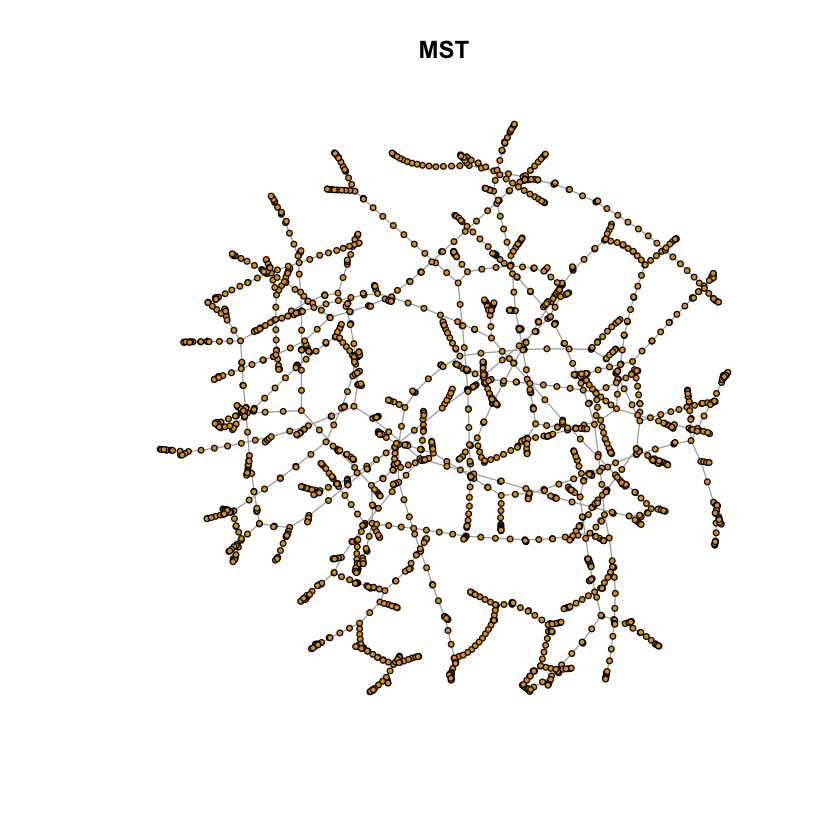

In [7]:
mst = mst(gcc, weights = E(gcc)$mean_travel_time)
plot(mst, vertex.color = rep(1, vcount(gcc)), vertex.size = rep(2, vcount(gcc)), vertex.label = NA, main="MST")

In [8]:
E(gcc)[get.edge.ids(g, c('1938','176'))]$mean_travel_time

[1] 977.055

In [9]:
adj_mat = as_adjacency_matrix(gcc, type = "both", attr = "mean_travel_time")
E(gcc)

+ 320916/320916 edges from 80e5974 (vertex names):
 [1] 1982--2213 1982--2202 1982--1743 1982--1781 1982--98   1982--2209
 [7] 1982--808  1982--2022 1982--650  1982--652  1982--2272 1982--1651
[13] 1982--2308 1982--2485 1982--2634 1982--1271 1982--1060 1982--1063
[19] 1982--1689 1982--624  1982--608  1982--621  1982--628  1982--2593
[25] 1982--1032 1982--1050 1982--1557 1982--2067 1982--1578 1982--2396
[31] 1982--2387 1982--2466 1982--2235 1982--2673 1982--1019 1982--2389
[37] 1982--1504 1982--457  1982--623  1982--475  1982--1695 1982--416 
[43] 1982--415  1982--234  1982--366  1982--398  1982--294  1982--295 
[49] 1982--1080 1982--39   1982--253  1982--2709 1982--1449 1982--1534
[55] 1982--1066 1982--285  1982--286  1982--372  1982--385  1982--2367
+ ... omitted several edges

# Question 8

In [10]:
check_ineql <- function(gcc){ 
count = 0
iter = 0
print("start")
while(iter < 1000){
    v1 = sample(V(gcc), 1)[[1]]$name
    v2 = sample(V(gcc), 1)[[1]]$name
    v3 = sample(V(gcc), 1)[[1]]$name
    if(v1 != v2 && v2 != v3 && v1 != v3){
        a = adj_mat[v1,v2]
        b = adj_mat[v2,v3]
        c = adj_mat[v1,v3]
        if(a * b * c != 0){
            if((a > b + c) || (b > a + c) || (c > a + b)) count = count + 1
            iter = iter + 1
        }    
    }  
}
    return(count)
}


In [11]:
ineql = check_ineql(gcc)
ratio = ineql / 1000
1 - ratio
mst

[1] "start"


[1] 0.934

IGRAPH a10f86d UN-- 1898 1897 -- 
+ attr: name (v/c), DISPLAY (v/x), loc_x (v/x), loc_y (v/x), loc (v/x),
| mean_travel_time (e/n)
+ edges from a10f86d (vertex names):
 [1] 1982--7    1982--1995 1982--2542 2213--457  2213--886  438 --2304
 [7] 438 --1827 448 --1554 2231--1729 2202--1029 2202--1634 2250--685 
[13] 2250--1759 2250--1467 1762--1759 1762--1209 1762--1763 1760--1469
[19] 1760--1761 1743--2505 1743--234  1743--1728 1750--2244 1750--1467
[25] 1770--2695 1770--967  1781--2673 1781--908  1781--1703 1781--82  
[31] 1690--905  1691--644  1691--1245 97  --596  83  --941  83  --777 
[37] 83  --2011 87  --927  87  --741  77  --820  2344--1298 2344--535 
+ ... omitted several edges